# Plot the maps for the whole array and the subarrays

In [1]:
# Importing modules
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd
import numpy as np
from utils_basic import EASTMIN_WHOLE as eastmin_whole, EASTMAX_WHOLE as eastmax_whole, NORTHMIN_WHOLE as northmin_whole, NORTHMAX_WHOLE as northmax_whole
from utils_basic import EASTMIN_A as eastmin_a, EASTMAX_A as eastmax_a, NORTHMIN_A as northmin_a, NORTHMAX_A as northmax_a
from utils_basic import EASTMIN_B as eastmin_b, EASTMAX_B as eastmax_b, NORTHMIN_B as northmin_b, NORTHMAX_B as northmax_b
from utils_basic import ROOTDIR_GEO as geo_dir, ROOTDIR_HYDRO as hydro_dir
from utils_basic import INNER_STATIONS as inner_stations
from utils_plot import save_figure
from os.path import join

In [2]:
# Inputs
stations_highlight = {"A01": (2.0, 2.0), "B01": (2.0, 2.0), "B19": (2.0, 2.0)}
output_suffix_full = "whole_deployment_spectrograms"

label_borehole = False

size_station_whole = 60
size_station_a = 80
size_station_b = 80

size_borehole_whole = 60
size_borehole_a = 80
size_borehole_b = 80

scale_whole = 20
scale_a = 10
scale_b = 12

edgewidth_normal = 0.5
edgewidth_highlight = 1.5


In [3]:
# Read the station and borehole coordinates
inpath = join(geo_dir, "geo_stations.csv")
stadf = pd.read_csv(inpath, index_col=0)

inpath = join(hydro_dir, "boreholes.csv")
bordf = pd.read_csv(inpath, index_col=0)


Figure saved to /fp/projects01/ec332/data/figures/station_map_w_subarray_boxes_whole_deployment_spectrograms.png


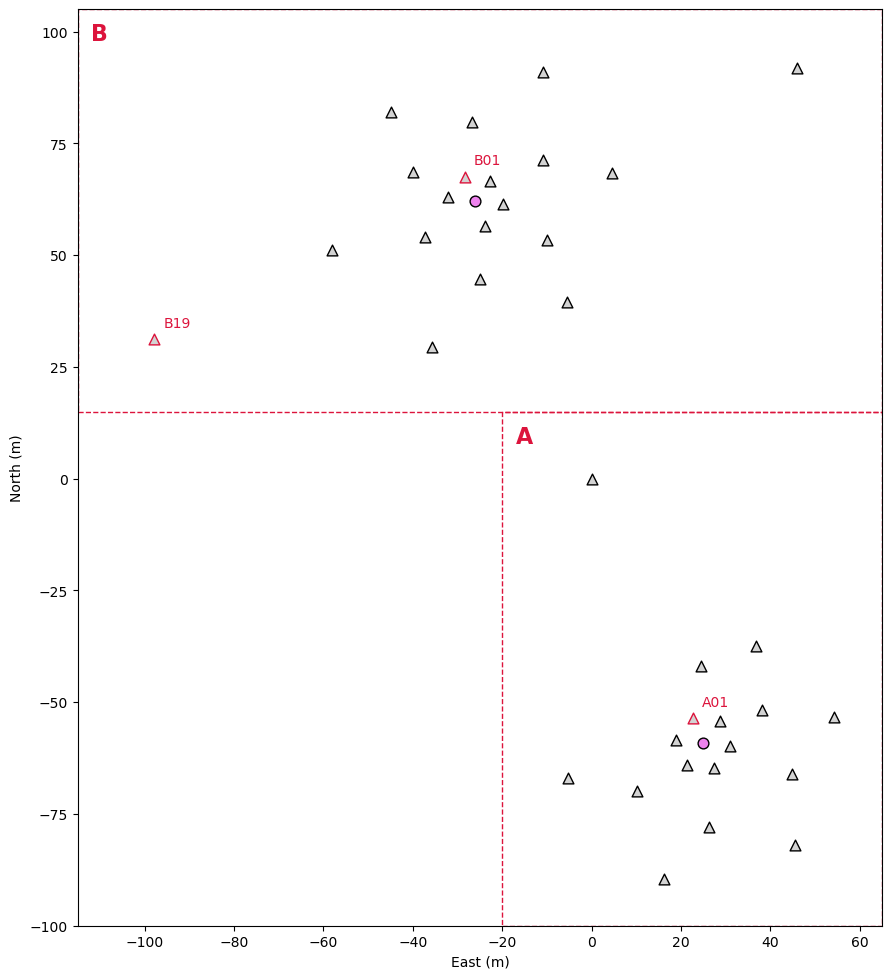

In [4]:
# Plot the whole array
fig = plt.figure(figsize=((eastmax_whole-eastmin_whole)/scale_whole, (northmax_whole-northmin_whole)/scale_whole))
ax = fig.add_subplot(111)

for i, row in stadf.iterrows():
    name = row["name"]
    if name in stations_highlight.keys():
        offset_east = stations_highlight[name][0]
        offset_north = stations_highlight[name][1]
        ax.scatter(row["east"], row["north"], marker="^", color="lightgray", edgecolors="crimson", s=size_station_whole)

        if offset_east > 0:
            ha = "left"
        else:
            ha = "right"

        if offset_north > 0:
            va = "bottom"
        else:
            va = "top"

        ax.annotate(name, xy=(row["east"], row["north"]), xytext=(row["east"] + offset_east, row["north"] + offset_north), color = "crimson", fontsize=10, va = va, ha = ha) 
            
    else:
        ax.scatter(row["east"], row["north"], marker="^", color="lightgray", edgecolors="black", s=size_station_whole)

for i, row in bordf.iterrows():
    ax.scatter(row["east"], row["north"], marker="o", color="violet", edgecolors="black", s=size_borehole_whole)

    if label_borehole:
        ax.annotate(row["name"], xy=(row["east"], row["north"]), xytext=(row["east"]+3, row["north"]+10), color = "violet", fontsize=12, fontweight="bold", ha="left", va="bottom", arrowprops = dict(edgecolor="black", arrowstyle='-'))

ax.text(eastmin_a+3, northmax_a-3, "A", ha="left", va="top", fontsize=16, fontweight="bold", color="crimson")
ax.text(eastmin_b+3, northmax_b-3, "B", ha="left", va="top", fontsize=16, fontweight="bold", color="crimson")

ax.set_xlabel("East (m)")
ax.set_ylabel("North (m)")
ax.set_xlim(eastmin_whole, eastmax_whole)
ax.set_ylim(northmin_whole, northmax_whole)
ax.set_aspect("equal")


# Create the rectangle patch
rect1 = Rectangle((eastmin_a, northmin_a), eastmax_a - eastmin_a, northmax_a - northmin_a, 
                    linewidth=1, edgecolor='crimson', facecolor='none', linestyle='dashed')

rect2 = Rectangle((eastmin_b, northmin_b), eastmax_b - eastmin_b, northmax_b - northmin_b,
                    linewidth=1, edgecolor='crimson', facecolor='none', linestyle='dashed')

# Add the rectangle patch to the plot
ax.add_patch(rect1)
ax.add_patch(rect2)

## Save the figure
fig.tight_layout()
filename = f"station_map_w_subarray_boxes_{output_suffix_full}.png"

save_figure(fig, filename)

Figure saved to /fp/projects01/ec332/data/figures/station_map_A.png


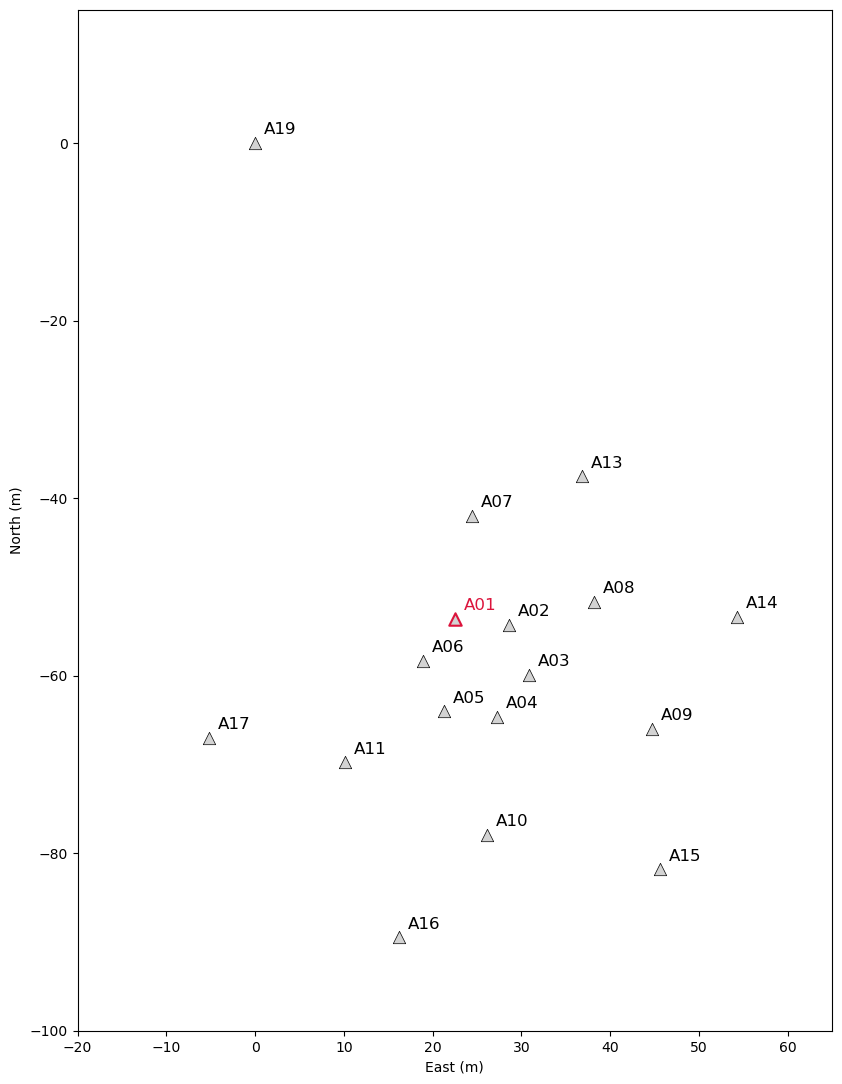

In [5]:
# Plot Subarray A
fig = plt.figure(figsize=((eastmax_a-eastmin_a)/scale_a, (northmax_a-northmin_a)/scale_a))
ax = fig.add_subplot(111)

stadf_a = stadf[stadf["subarray"] == "A"]

for i, row in stadf_a.iterrows():
    if row["name"] in stations_highlight:
        ax.scatter(row["east"], row["north"], marker="^", color="lightgray", edgecolors="crimson", s=size_station_a, linewidth=edgewidth_highlight)
        ax.annotate(row["name"], (row["east"]+1, row["north"]+1), fontsize=12, color="crimson")
    else:
        ax.scatter(row["east"], row["north"], marker="^", color="lightgray", edgecolors="black", s=size_station_a, linewidth=edgewidth_normal)
        ax.annotate(row["name"], (row["east"]+1, row["north"]+1), fontsize=12, color="black")
        

for i, row in bordf.iterrows():
    if row["name"] == "A00":
        ax.scatter(row["east"], row["north"], marker="o", color="violet", edgecolors="black", s=size_borehole_a)
        ax.annotate(row["name"], (row["east"]+1, row["north"]+1), fontsize=12, color="k")

ax.set_xlabel("East (m)")
ax.set_ylabel("North (m)")
ax.set_xlim(eastmin_a, eastmax_a)
ax.set_ylim(northmin_a, northmax_a)
ax.set_aspect("equal")

# Save the figure
fig.tight_layout()
filename = f"station_map_A.png"

save_figure(fig, filename)

Figure saved to /fp/projects01/ec332/data/figures/station_map_A.png


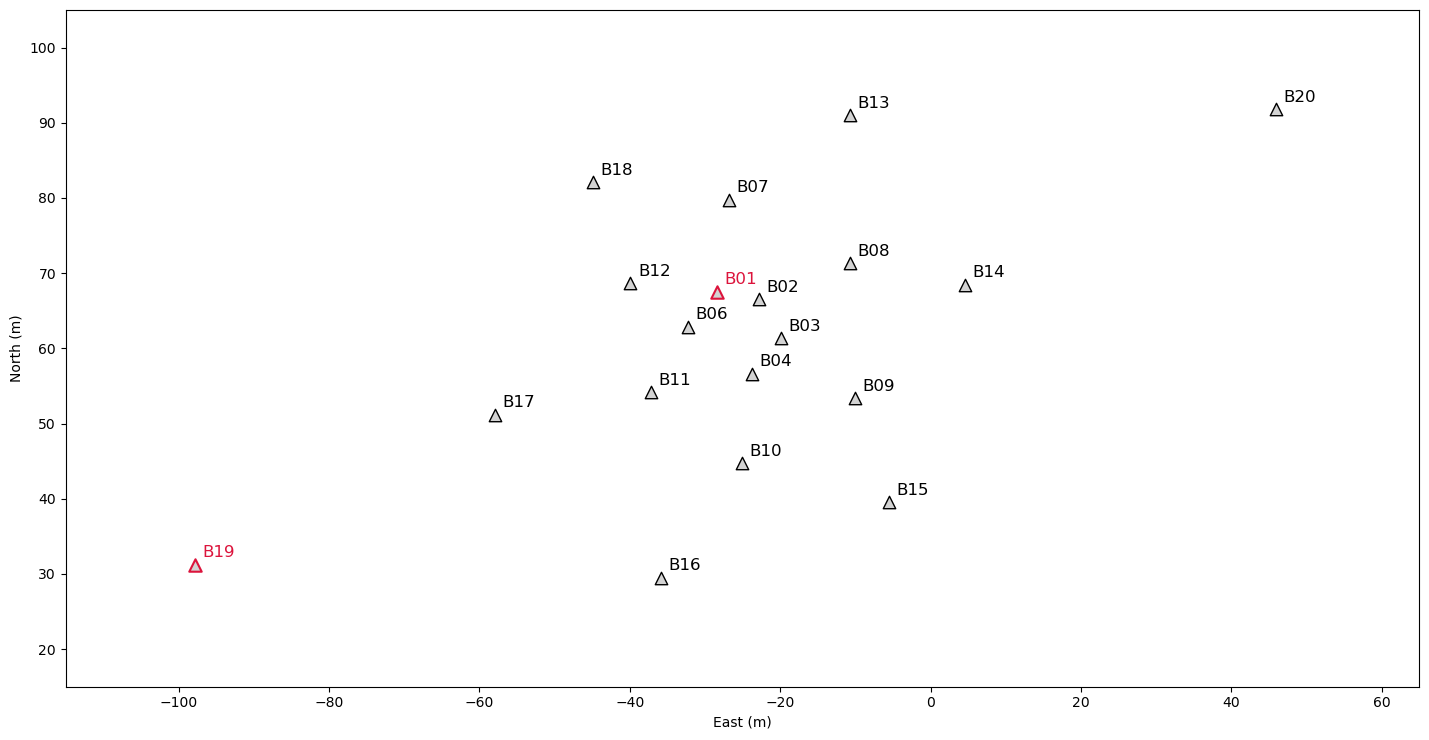

In [6]:
## Plot Subarray B
fig = plt.figure(figsize=((eastmax_b-eastmin_b)/scale_a, (northmax_b-northmin_b)/scale_b))
ax = fig.add_subplot(111)

stadf_b = stadf[stadf["subarray"] == "B"]

for i, row in stadf_b.iterrows():
    if row["name"] in stations_highlight:
        ax.scatter(row["east"], row["north"], marker="^", color="lightgray", edgecolors="crimson", s=size_station_b, linewidth=edgewidth_highlight)
        ax.annotate(row["name"], (row["east"]+1, row["north"]+1), fontsize=12, color="crimson")
    else:
        ax.scatter(row["east"], row["north"], marker="^", color="lightgray", edgecolors="black", s=size_station_b)
        ax.annotate(row["name"], (row["east"]+1, row["north"]+1), fontsize=12, color="black")

for i, row in bordf.iterrows():
    if row["name"] == "B00":
        ax.scatter(row["east"], row["north"], marker="o", color="violet", edgecolors="black", s=size_borehole_b)
        ax.annotate(row["name"], (row["east"]+1, row["north"]+1), fontsize=12, color="k")
    
ax.set_xlabel("East (m)")
ax.set_ylabel("North (m)")
ax.set_xlim(eastmin_b, eastmax_b)
ax.set_ylim(northmin_b, northmax_b)
ax.set_aspect("equal")

# Save the figure
fig.tight_layout()
filename = f"station_map_A.png"

save_figure(fig, filename)